# Titanic Survival Prediction Model

## Data Loading and Exploration

In [12]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# List of numerical and categorical columns for visualization
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

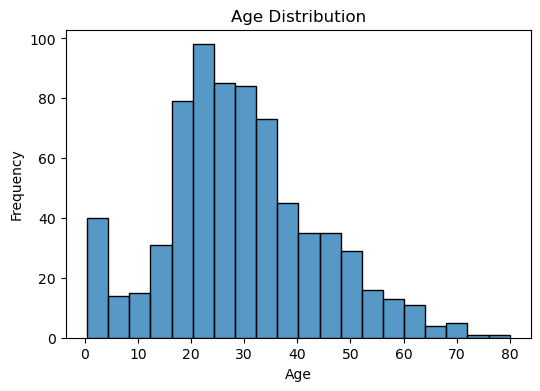

In [16]:
# Visualization for the 'Age' distribution
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


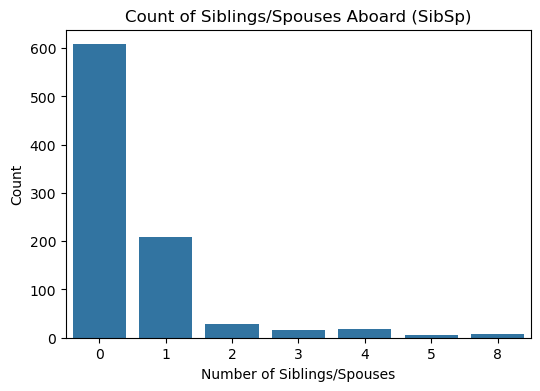

In [17]:
# Redoing the visualization for the 'SibSp' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', data=train_data)
plt.title('Count of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()


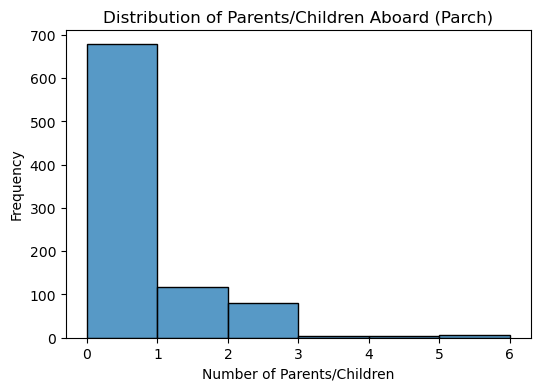

In [18]:
# Visualization for the 'Parch' distribution
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Parch'], kde=False, bins=range(0, train_data['Parch'].max() + 1))
plt.title('Distribution of Parents/Children Aboard (Parch)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.show()


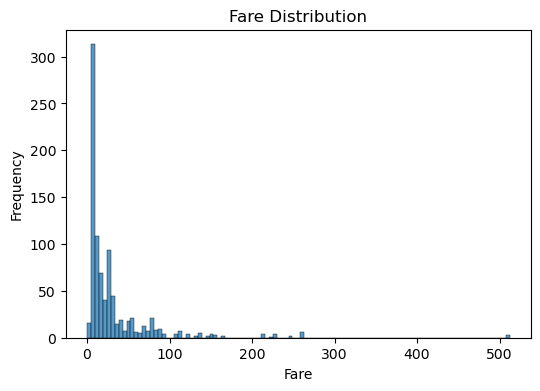

In [19]:
# Visualization for the 'Fare' distribution
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


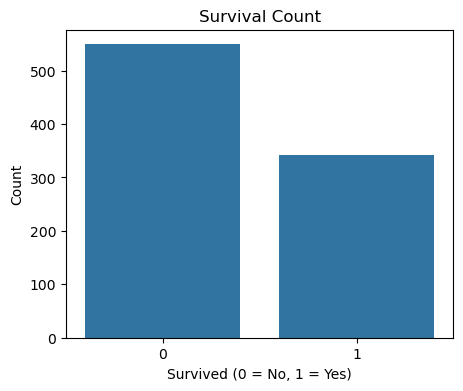

In [20]:
# Visualization for the 'Survived' feature
plt.figure(figsize=(5, 4))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


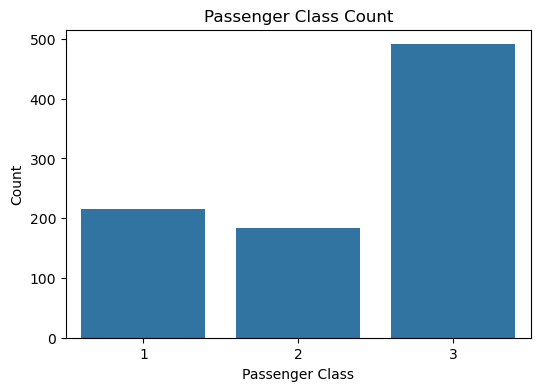

In [21]:
# Visualization for the 'Pclass' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


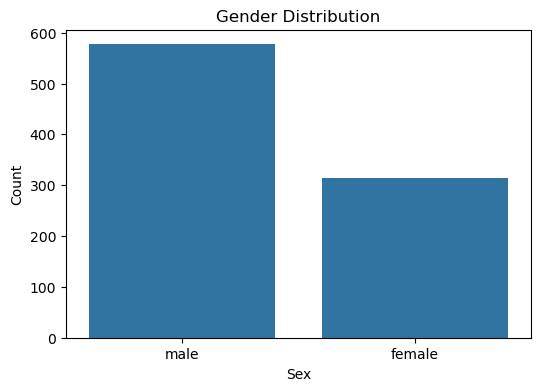

In [22]:
# Visualization for the 'Sex' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train_data)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


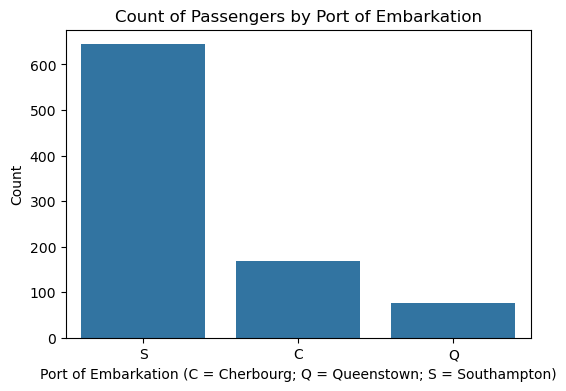

In [23]:
# Visualization for the 'Embarked' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=train_data)
plt.title('Count of Passengers by Port of Embarkation')
plt.xlabel('Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)')
plt.ylabel('Count')
plt.show()


## Missing Values

In [24]:
missing_values = train_data.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(train_data)) * 100

# Display missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data.sort_values(by='Missing Values', ascending=False)
missing_data

,Missing Values,Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


In [26]:
# Treating missing values as more then 75 null values 

# Dropping 'Cabin' column
data_cleaned = train_data.drop('Cabin', axis=1)



In [27]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
# Imputing 'Age' with median
median_age = data_cleaned['Age'].median()
data_cleaned['Age'].fillna(median_age, inplace=True)

# Imputing 'Embarked' with mode
mode_embarked = data_cleaned['Embarked'].mode()[0]
data_cleaned['Embarked'].fillna(mode_embarked, inplace=True)




/tmp/ipykernel_12782/3504338313.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Age'].fillna(median_age, inplace=True)
/tmp/ipykernel_12782/3504338313.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [29]:
# Check if all missing values are treated
missing_values_after = data_cleaned.isnull().sum()
missing_values_after

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Outliers

In [30]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

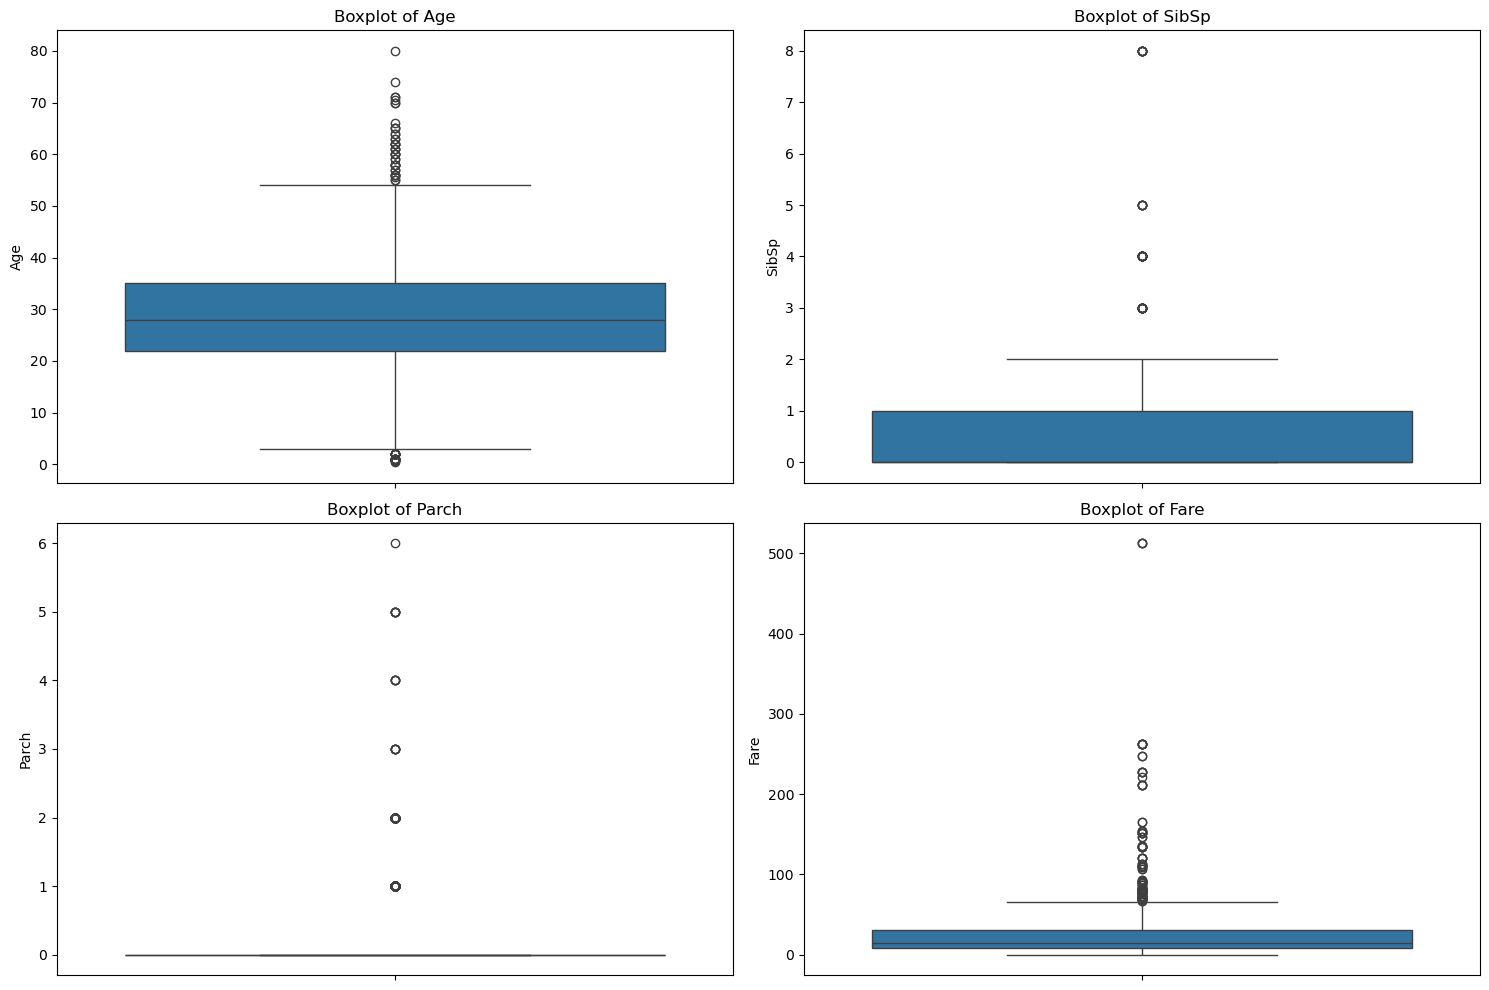

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data_cleaned[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


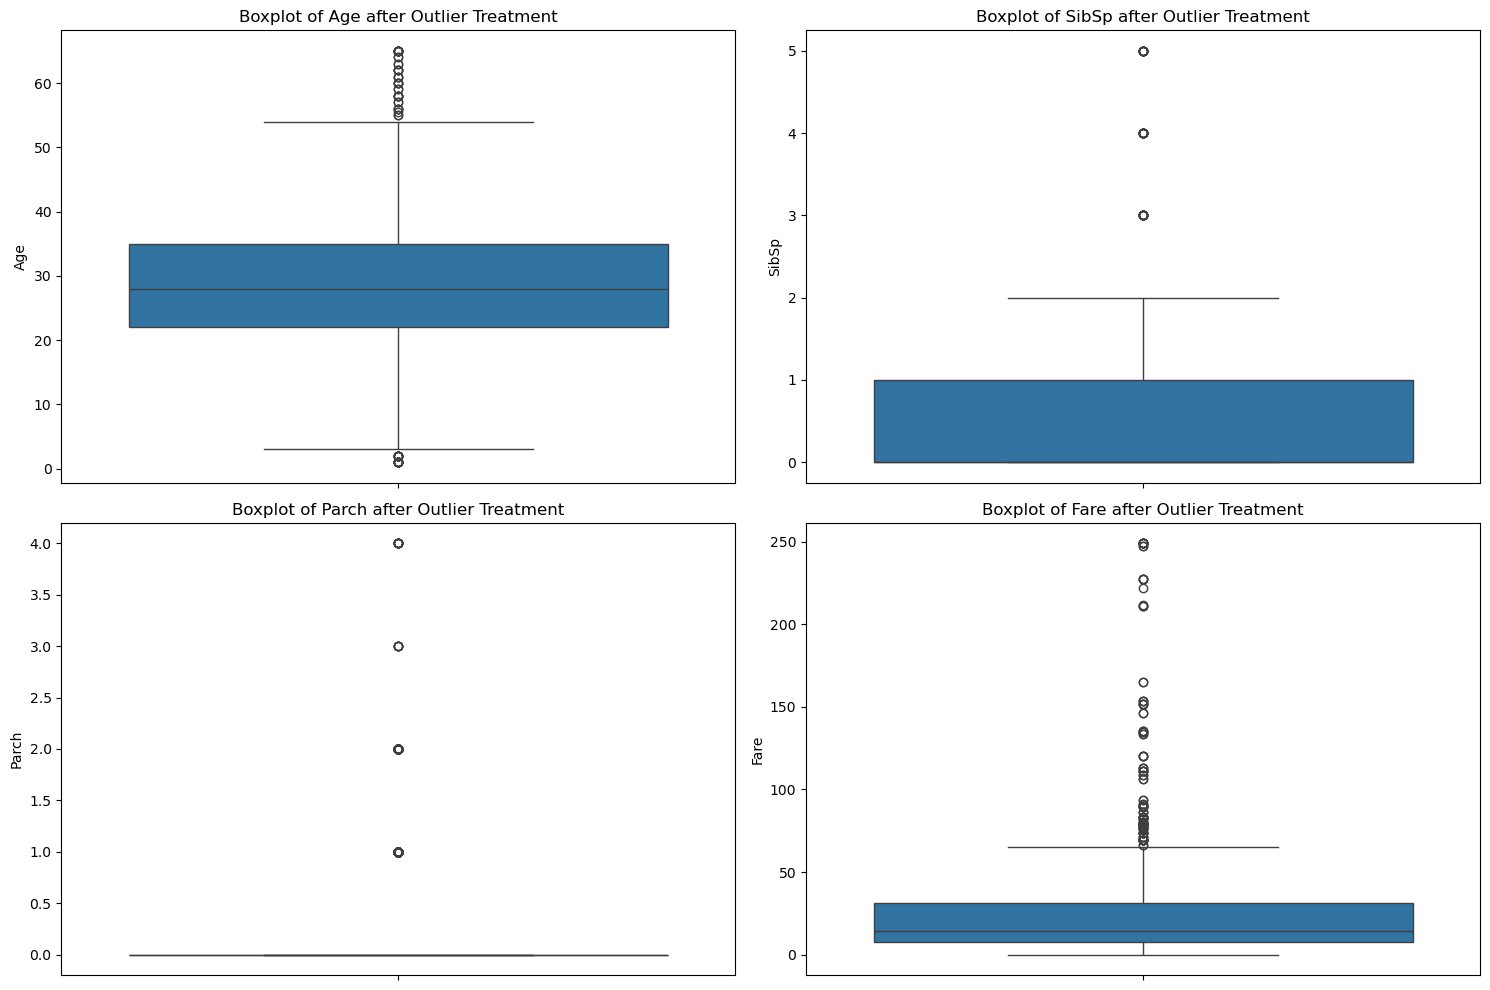

In [32]:
import numpy as np
# Applying the percentile method to treat outliers
for col in numerical_features:
    lower_percentile = data_cleaned[col].quantile(0.01)
    upper_percentile = data_cleaned[col].quantile(0.99)

    # Capping the data
    data_cleaned[col] = np.where(data_cleaned[col] < lower_percentile, lower_percentile, data_cleaned[col])
    data_cleaned[col] = np.where(data_cleaned[col] > upper_percentile, upper_percentile, data_cleaned[col])

# Check the effect of this treatment by displaying the updated boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data_cleaned[col])
    plt.title(f'Boxplot of {col} after Outlier Treatment')

plt.tight_layout()
plt.show()


In [33]:
data_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C


In [34]:
train_data=data_cleaned

In [45]:
# Preprocessing the test data similarly to the training data

# Dropping 'Cabin' column
test_data_cleaned = test_data.drop('Cabin', axis=1)

# Imputing 'Age' and 'Fare' with median from the training dataset
test_data_cleaned['Age'].fillna(median_age, inplace=True)
median_fare = data_cleaned['Fare'].median()
test_data_cleaned['Fare'].fillna(median_fare, inplace=True)

# Imputing 'Embarked' with mode from the training dataset
test_data_cleaned['Embarked'].fillna(mode_embarked, inplace=True)

# Encode categorical variables
# 'Sex' and 'Embarked' can be encoded using one-hot encoding
# 'Pclass' is a categorical feature that can be treated as numerical in this context (ordinal encoding)

# Applying one-hot encoding to 'Sex' and 'Embarked'
data_encoded = pd.get_dummies(data_cleaned, columns=['Sex', 'Embarked'])
test_data_encoded = pd.get_dummies(test_data_cleaned, columns=['Sex', 'Embarked'])




/tmp/ipykernel_12782/1125503716.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_cleaned['Age'].fillna(median_age, inplace=True)
/tmp/ipykernel_12782/1125503716.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [36]:
data_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,0,1,0,0,1


In [37]:
test_data_encoded.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1


In [38]:
# Dropping 'Name' and 'Ticket' fields from both datasets
data_encoded = data_encoded.drop(['Name', 'Ticket'], axis=1)

test_data_encoded = test_data_encoded.drop(['Name', 'Ticket'], axis=1)




In [39]:
data_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1.0,0.0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0.0,0.0,8.0500,0,1,0,0,1


In [40]:
test_data_encoded.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


## Linear regression model

In [41]:
# Selecting relevant features and dropping ones that are less likely to have predictive power
y_train = data_encoded['Survived']
X_train = data_encoded.drop(['Survived'], axis=1)
X_test = test_data_encoded



In [42]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predictions for the test dataset
predictions_linear_reg = linear_reg.predict(X_test)

# Displaying the first few predictions as an example
predictions_linear_reg[:10]


array([0.12305813, 0.44310465, 0.13543898, 0.10688374, 0.58564879,
       0.18629135, 0.65642829, 0.23725962, 0.73463125, 0.05051709])

# Multiple Linear Regression:

In [43]:
# Assuming X_train and X_test contain multiple features
# Create a multiple linear regression model
multiple_linear_reg = LinearRegression()

# Train the model
multiple_linear_reg.fit(X_train, y_train)

# Predictions for the test dataset
predictions_multiple_linear_reg = multiple_linear_reg.predict(X_test)

# Displaying the first few predictions as an example
predictions_multiple_linear_reg[:10]


array([0.12305813, 0.44310465, 0.13543898, 0.10688374, 0.58564879,
       0.18629135, 0.65642829, 0.23725962, 0.73463125, 0.05051709])

# K-Nearest Neighbors (KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors = 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions for the test dataset
predictions_knn = knn_classifier.predict(X_test)

# Displaying the first few predictions as an example
predictions_knn[:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])